<img src="download.jpg" style="width:700px;height:400px"/>

## <font color = black> BUSINESS INSIGHTS USING PYTHON (NOTEBOOK 1/3) </font> 

## <font color = grey> Introduction: </font> <br>

Business analysis helps organisations stay relevant in the market. Providing business insights helps organisations to come up with better forecasts based on the previous perfomance.<br>

For any business to fluorish, customer behaviour analysis should be taken into consideration. Hence it is important for business firms to use cohort analysis in order to analyze customer behaviour across the life cycle of each customer. Cohort analysis can be time-based, segment-based or size-based.<br>

Predicting the future of any business is highly dependent on customers/ clients, i.e, weither a customer/client leavess or stays. This calls for churn prediction to predict which customers are likely to leave the service because aquiring new customers/clients often costs more than retaining existing ones.<br>

This notebook is one of the business insights project series usinng Python and consists of five sections. It covers EDA, data cleaning, feature engineering, relationship analysis, sales insights and other projects. The remaing notebooks, to be released, will cover Customer segmentation (cohort analysis) and Customer churn prediction (using machine learning), respectively.<br> 
The three notebooks and dataset used (kaggle datasets)

## 
## <font color = grey> Notebook scope: </font> 

#### <font color = blue> Section 1: Data exploration </font>
 - Shape of the data <br>
 - Basic Information of Data <br>
 - Columns descriptions and its types <br>
 - Descriptive statistical summary of data <br>
        
#### <font color = blue> Section 2: Data Cleaning and feature engineering </font>
 - Checking missing values <br>
 - Feature Engineering <br>
    - *Transforming necessary columns types* <br>
    - *Adding New columns* <br> 
    - *Decoding the categorical column value* <br>
    - *Deleting some columns* <br> 
#### <font color = blue> Section 3 : Relationships among variables </font> <br>
   - Correlation matrix <br>
   - Correlation ranks <br>
   - Linear relationship (regression) 

#### <font color = blue> Section 4: Insights </font>
#### <font color = blue> Section 5: Other projects </font>


In [1]:
# import Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind,ttest_rel
from scipy import stats

In [2]:
#import mitosheet
#mitosheet.sheet(analysis_to_replay="id-yasgmqzfwd")

In [3]:
Online_Retail = pd.read_excel('D:\MAKINA 3\AQSKILLS\DATA SCIENCE\customer segementation dataset\supermarket_sales _data.xlsx')

In [4]:
df = Online_Retail
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Cost of goods sold,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4


## __Section 1 : Basic Understanding of Data__

#### - Find Number of rows and columns

In [5]:
df.shape

(1000, 16)

- _Number of rows - 1000_

- _Number of columns - 16_

#### - Column names

In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Total', 'Date', 'Time',
       'Payment', 'Cost of goods sold', 'gross margin percentage',
       'gross income', 'Rating'],
      dtype='object')

#### - Basic information about the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Total                    1000 non-null   float64       
 9   Date                     1000 non-null   datetime64[ns]
 10  Time                     1000 non-null   object        
 11  Payment                  1000 non-null   object        
 12  Cost of goods sold       1000 non-n

#### -  Descriptive Statistical summary of data 

### Mean
Suppose we have X and Y variables, to find the means for X ($\bar{X}$) and Y ($\bar{Y}$) from $i= 1, 2,\dots,n$ samples then we can
let $X_{i}$ (for $i=1,2,\dots,n$) be the values of X-variable. Then the mean is given by,

\begin{align}
\bar{X}= \frac{1}{N}\left(\sum X_{i}\right)
\end{align}

Similarly, for Y-variable we have,

\begin{align}
\bar{Y}= \frac{1}{N}\left(\sum Y_{i}\right)
\end{align} 

### Standard deviation
The variance or dispersion of the set of variances is given by,

\begin{align}
\sigma^{2}=\frac{1}{n}\sum_{i=1}^{n}\left(X_{i}-\mu\right)^{2}
\end{align}

A standard deviation (or $\sigma$) is a measure of how dispersed the data is in relation to the mean. Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out. A standard deviation close to zero indicates that data points are close to the mean, whereas a high or low standard deviation indicates data points are respectively above or below the mean (link: https://www.nlm.nih.gov).

The standard deviation ($\sigma$) is the square root of variance hence the equation above becomes

\begin{align}
\sigma=\sqrt{\sigma^{2}}=\sqrt{\frac{1}{n}\sum\limits_{i=1}^{n}\left(X_{i}-\mu\right)^{2}}
\end{align}

Practically, the true mean ($\mu$) is not known thus, it is estimated by the sample mean ($\bar{X}$) and the sample variance is denoted by $S^{2}$. Therefore the equation above becomes

\begin{align}
S^{2}=\frac{1}{n-1}\sum\limits_{i=1}^{n}\left(X_{i}-\bar{X}\right)^{2}
\end{align}

Similarly, we can rewrite the above equation as:

\begin{align}
S=\sqrt{S^{2}}=\sqrt{\frac{1}{n-1}\sum\limits_{i=1}^{n}\left(X_{i}-\bar{X}\right)^{2}}
\end{align}


In [8]:
descriptive=df.describe().T
descriptive

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
Cost of goods sold,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


In [9]:
Difference=descriptive["mean"]-descriptive["std"] 
Difference

Unit price                 29.177502
Quantity                    2.586569
Total                      77.081414
Cost of goods sold         73.410870
gross margin percentage     4.761905
gross income                3.670544
Rating                      5.254120
dtype: float64

From the above output it can be noticed that there is a wide dispersion between mean and standard deviation on Unit price, Total and Cost of goods sold.

In [10]:
df.describe(include="object")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,19:48:00,Ewallet
freq,1,340,340,501,501,178,7,345


## __Section 2:  Cleaning and  Transforming of Data__ 

## -  Checking missing values in the data

In [11]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Total                      0
Date                       0
Time                       0
Payment                    0
Cost of goods sold         0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

From the above output, the data has no null values

## - Feature engineering

#### Do Necessary columns conversions

####  - Converting date column to datetime datatype 

In [12]:
df["Date"]=pd.to_datetime(df["Date"])

#### Adding the attribute Month to df

In [13]:
from datetime import datetime as dt
df["month"]=df.Date.dt.month
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Cost of goods sold,gross margin percentage,gross income,Rating,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3


#### Adding the attribute weekday to df

In [14]:
from datetime import datetime as dt
df["weekday"]=df.Date.dt.weekday
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Cost of goods sold,gross margin percentage,gross income,Rating,month,weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,3,4
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,6


#### Adding the attribute Margin_income to df

In [15]:
df["Margin_income"]=df["Total"]*df["gross margin percentage"]
df.head(3)   

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Cost of goods sold,gross margin percentage,gross income,Rating,month,weekday,Margin_income
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,1,5,2614.15
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,3,4,382.00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,6,1621.55


### checking attributes types

In [16]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
Cost of goods sold                float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
month                               int64
weekday                             int64
Margin_income                     float64
dtype: object

####  Decoding the month column as 

1: January

2: February

3: March

In [17]:
df["month"]=df["month"].replace({1:"January"})
df["month"]=df["month"].replace({2:"February"})
df["month"]=df["month"].replace({3:"March"})
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Cost of goods sold,gross margin percentage,gross income,Rating,month,weekday,Margin_income
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,January,5,2614.15
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,March,4,382.00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,March,6,1621.55


#### Reducing dimensions of data (dropping 'City' column)

In [18]:
df.drop('City', inplace=True, axis=1)

In [19]:
df.shape

(1000, 18)

#### checking outliers using box plots

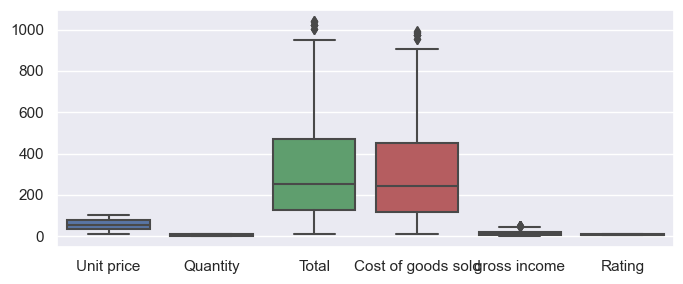

In [20]:
# Tovisualize using seaborn
sns.set()
# Set the figure size
plt.rcParams["figure.figsize"] = [7, 3]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Unit price","Quantity","Total ","Cost of goods sold", "gross income","Rating"})

# Plot the dataframe
ax = sns.boxplot(df[["Unit price","Quantity","Total","Cost of goods sold", "gross income","Rating"]])

# Display the plot
plt.show()

#### checking outliers using interquartile range (IQR)

This method of detecting and removing of  outliers is suggested since not all data is normal or normal enough to treat it as being drawn from Gaussian distribution.<br>
Firstly, we need to calculate the interquartile range (IQR).<br>

\begin{align}
IQR = Q_{3}-Q_{1}
\end{align}

We need to calculate lower limit and upper limit in order to use this method.<br>
lower_limit = $Q_{1}-1.5(IQR)$ and upper_limit = $Q_{3}+1.5(IQR)$ <br>

Where,<br>
$Q_{1}$ = $25^{th}$ percentile.<br> 
$Q_{3}$ = $75^{th}$ percentile.<br>

All the values below the __lower_limit__ are considered as outliers. Also all the values above the __upper_limit__ are considered as outliers.

Since outliers can be maintained for this project, for demonstration purposes, let us indentify and remove outliers by creating a new dataframe (df3) for 'total' column from our original dataset 

<AxesSubplot: >

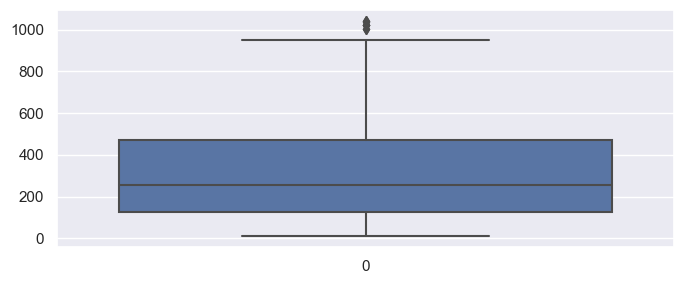

In [21]:
sns.boxplot(df['Total'])

In [22]:
df3 = df[['Total']]
df3.head(3)

,Total
0,548.9715
1,80.2200
2,340.5255


In [23]:
Q1 = df3.Total.quantile(0.25)
Q3 = df3.Total.quantile(0.75)
Q1,Q3

(124.422375, 471.35024999999996)

In [24]:
IQR = Q3-Q1
IQR

346.927875

In [25]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

(-395.9694375, 991.7420625)

Detecting outliers

In [26]:
df3[(df3.Total<lower_limit)|(df3.Total>upper_limit)]

,Total
166,1003.590
167,1039.290
350,1042.650
357,1002.120
422,1020.705
557,1034.460
699,1023.750
792,1022.385
996,1022.490


Creating a new dataframe without outliers

In [27]:
df3_without_outliers= df3[(df3.Total>lower_limit)&(df3.Total<upper_limit)]

<AxesSubplot: >

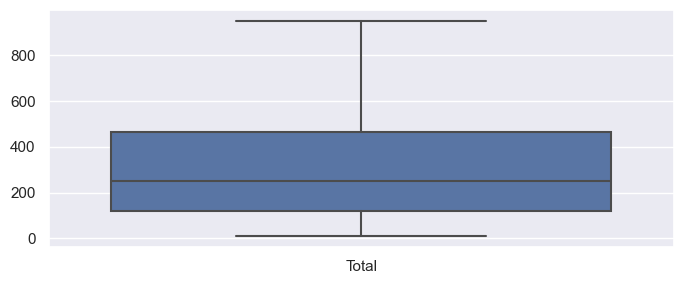

In [28]:
sns.boxplot(df3_without_outliers)

From the above output, we notice the box-plot has no outliers

##  __Section 3 : checking relationships__

### - Correlation matrix

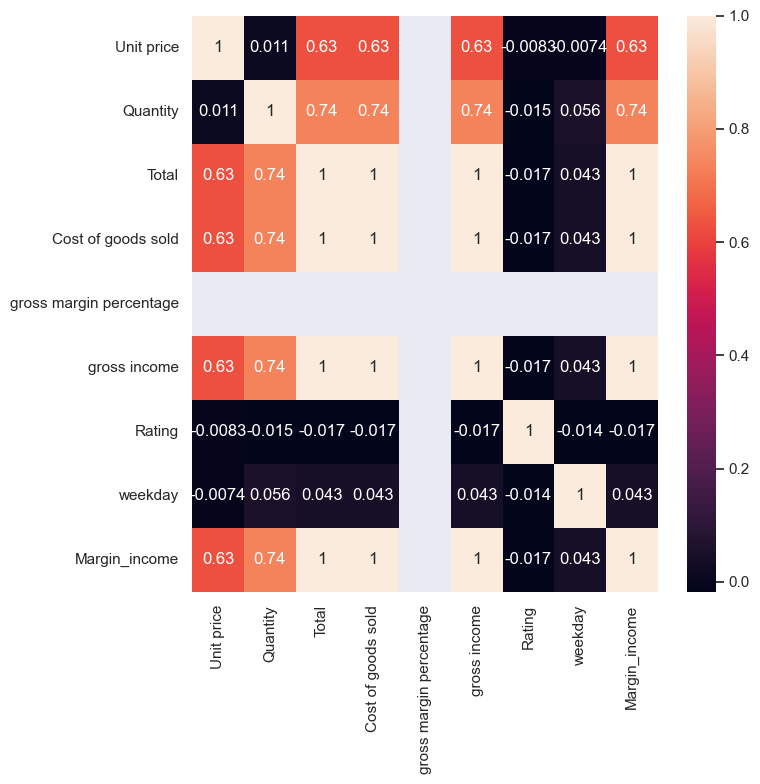

In [29]:
plt.figure(figsize=(8,8))
cor_matrix=df.corr(method="spearman")  # spearman is used as it has outliers 
sns.heatmap(cor_matrix,annot=True);
# Note that pearson correlation is prefered for the data sets without outliers as it is robust compared to spearman

### - Ranked correlation

In [30]:
unstack=cor_matrix.unstack()

In [31]:
sort = unstack.sort_values()

In [32]:
high_cor=sort[((sort)<1)&((sort)>0.7)]
high_cor.to_frame(name= 'Value')

Value
Quantity           Total               0.735265
                   Cost of goods sold  0.735265
                   gross income        0.735265
                   Margin_income       0.735265
Total              Quantity            0.735265
gross income       Quantity            0.735265
Margin_income      Quantity            0.735265
Cost of goods sold Quantity            0.735265

### - Regression

Let us check if there is a linear relationship between Quantity of goods and other variables exhibiting high correlation from the above output.

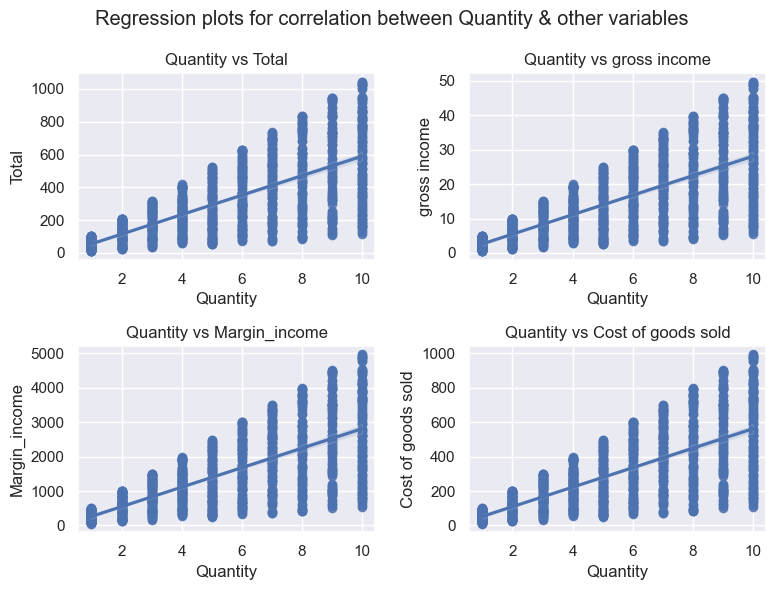

In [33]:
plt.figure(figsize = (8,6))
plt.suptitle('Regression plots for correlation between Quantity & other variables')
plt.subplots_adjust(left=0.1, bottom=0.1,right=0.2,top=0.2,wspace=2,hspace=2)

plt.subplot(2,2,1)
plt.title('Quantity vs Total')
sns.regplot(x=df['Quantity'], y=df['Total'], data = df[['Quantity','Total']])

plt.subplot(2,2,2)
plt.title('Quantity vs gross income')
sns.regplot(x=df['Quantity'], y=df['gross income'], data = df[['Quantity','gross income']])

plt.subplot(2,2,3)
plt.title('Quantity vs Margin_income')
sns.regplot(x=df['Quantity'], y=df['Margin_income'], data = df[['Quantity','Margin_income']])

plt.subplot(2,2,4)
plt.title('Quantity vs Cost of goods sold')
sns.regplot(x=df['Quantity'], y=df['Cost of goods sold'], data = df[['Quantity','Cost of goods sold']])
plt.show()

## __Section 4: Business insights__

__Usiful operations and functions__<br>

 - *Groupby operation:* This is an operation which involves some combination of splitting the object, applying a function and combining the results.<br>
 - *Aggregate functions:* A mathematical computation involving a range of values that results in just a single value expressing the significance of the accumulated data.<br>
 
By utilizing the power of groupby operations and aggregate functions, 33 insights were derived from the dataset.

### (1) Find Total sale and total margin_income of the company 

In [34]:
print("Total/Gross sale is : ",df["Total"].sum())
print("Total margin_income is : ",df["Margin_income"].sum())

Total/Gross sale is :  322966.749
Total margin_income is :  1537936.900030759


From the above digits,<br>
- The value of all invoices for an accounting period of three months before making any adjustment is __322,966.749__<br>
 - The amount of money the firm returns after including the direct costs associated with producing the goods it sells is __1,537,936.900030759__

### (2) Find Total sale and Margin_income of each branch

In [35]:
print("Total sale\n")
print(df.groupby(["Branch"])["Total"].sum(),"\n")
print("Total margin_income \n")
print(df.groupby(["Branch"])["Margin_income"].sum(),"\n")

Total sale

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64 

Total margin_income 

Branch
A    505716.050010
B    505703.200010
C    526517.650011
Name: Margin_income, dtype: float64 



### (3) Find Total sale of all months for each branches 

In [36]:
df.groupby(["Branch","month"])["Total"].sum()

Branch  month   
A       February    29860.1205
        January     38681.1285
        March       37659.1215
B       February    34424.2710
        January     37176.0585
        March       34597.3425
C       February    32934.9825
        January     40434.6810
        March       37199.0430
Name: Total, dtype: float64

#### (4) Find total weekdays sale and weekends sale

In [37]:
week_df=df[df["weekday"]<5]
weekend_df=df[df["weekday"]>=5]
print("weekdays sale : ",week_df["Total"].sum())
print("weekends sale : ",weekend_df["Total"].sum())

weekdays sale :  222388.04700000002
weekends sale :  100578.702


### (5) Find week days and weekend sale of all branches

In [38]:
print("week days sale of all branches \n")
print(week_df.groupby(["Branch"])["Total"].sum())
print("weekends days sale of all barnches \n")
print(weekend_df.groupby(["Branch"])["Total"].sum())

week days sale of all branches 

Branch
A    72428.139
B    74497.920
C    75461.988
Name: Total, dtype: float64
weekends days sale of all barnches 

Branch
A    33772.2315
B    31699.7520
C    35106.7185
Name: Total, dtype: float64


##### WEEKDAY sale at branch C was highest

##### WEEKEND sale at branch C was highest

##### Therefore branch C of the company is doing well in terms of weekdays and weekend sales compared to the other branches.

#### (6) Find Weekend and weekday sale of each month for branch A

In [39]:
print("sale trend at Branch A\n")
a=df[(df["Branch"] =="A")]
week_a=a[a["weekday"]<5]
weekend_a=a[a["weekday"]>=5]

print("sale on week days in each month",week_a.groupby(["month"])["Total"].sum())
print("sale on weekend  in each month",weekend_a.groupby(["month"])["Total"].sum())

sale trend at Branch A

sale on week days in each month month
February    20417.2395
January     25736.4870
March       26274.4125
Name: Total, dtype: float64
sale on weekend  in each month month
February     9442.8810
January     12944.6415
March       11384.7090
Name: Total, dtype: float64


#####  In march sale in weekday was high and In january weekend sale is high at branch A

### (7) Find Highest, Lowest and Average sales record of each branch on any day

In [40]:
df.groupby(["Branch"])["Total"].agg(["max","min","mean"])

,max,min,mean
Branch,,,
A,1039.29,12.6945,312.354031
B,1022.49,18.6375,319.872506
C,1042.65,10.6785,337.099715


####  Visually we can depict highest sale record for each branch of any day as follows 

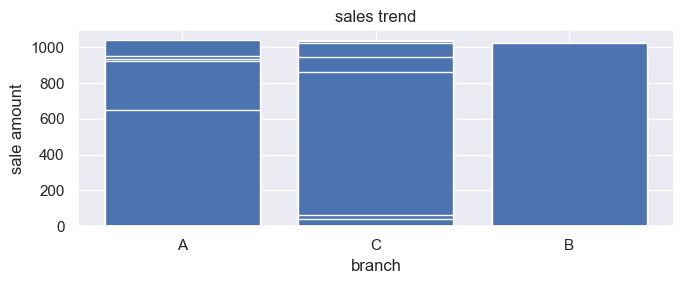

In [41]:
plt.bar(df["Branch"],df["Total"])  
plt.title('sales trend')  
plt.xlabel('branch')  
plt.ylabel('sale amount')  
plt.show()  

##### From the mean values, branch C has the highest sales on any day, hence the branch is likely to generate more profit compared to branch A and B

### (8) At which date and month highest sale was recorded at C branch ?

In [42]:
print("the highest sale was of amount : ",df["Total"].max())
df[(df["Total"]==df["Total"].max()) & (df["Branch"]=="C")][["month","Date"]]

the highest sale was of amount :  1042.65


,month,Date
350,February,2019-02-15


##### The branch manager can try to identify the customer and the type of goods he/she bought on $15^{th}$ February, 2019.

### (9) What was the category of customer and its corresponding product category?

In [43]:
df[df["Total"]==df["Total"].max()][["Branch","Date","Customer type","Product line"]]

,Branch,Date,Customer type,Product line
350,C,2019-02-15,Member,Fashion accessories


### (10) At which date and month lowest sale had been done at C branch ?

In [44]:
print("the lowest sale was of amount : ",df["Total"].min())
df[(df["Total"]==df["Total"].min()) & (df["Branch"]=="C")][["month","Date"]]

the lowest sale was of amount :  10.6785


,month,Date
822,February,2019-02-07


### (11) What was the category of customer and its corresponding product category?

In [45]:
df[df["Total"]==df["Total"].min()][["Branch","Date","Customer type","Product line"]]

,Branch,Date,Customer type,Product line
822,C,2019-02-07,Member,Sports and travel


#### (12) Find  highest sale  on any day in all months of all branches 

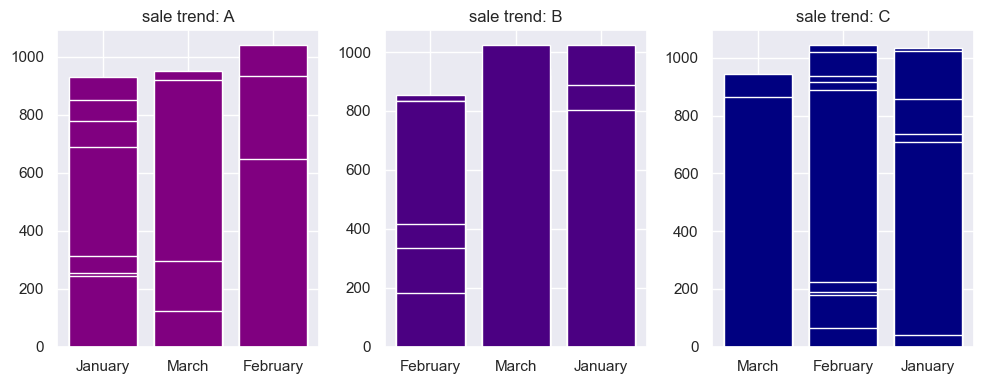

In [46]:
a=df[df["Branch"] =="A"]
plt.figure(figsize = (10,4))
plt.subplot(1,3,1)
plt.bar(a["month"],a["Total"],color = 'purple')
plt.title("sale trend: A")
b=df[df["Branch"] =="B"]
plt.subplot(1,3,2)
plt.bar(b["month"],b["Total"],color = 'indigo')
plt.title("sale trend: B")
c=df[df["Branch"] =="C"]
plt.subplot(1,3,3)
plt.bar(c["month"],c["Total"],color = 'navy')
plt.title("sale trend: C")
plt.show() 

####  At branch A  
 - Highest sale :  february
 - Lowest sale :  January
 
####  At branch B  
- Highest sale :  march 
- Lowest sale :  february
 
####  At branch C 
- Highest sale :  february
- Lowest sale :   march 

##### The branch manager can try to consider the factors leading to great sales on the stated days for each branch in order to maxmize profit in the following months. 

#### (13.a) Date wise Customers visiting trend of Branch A for each month 

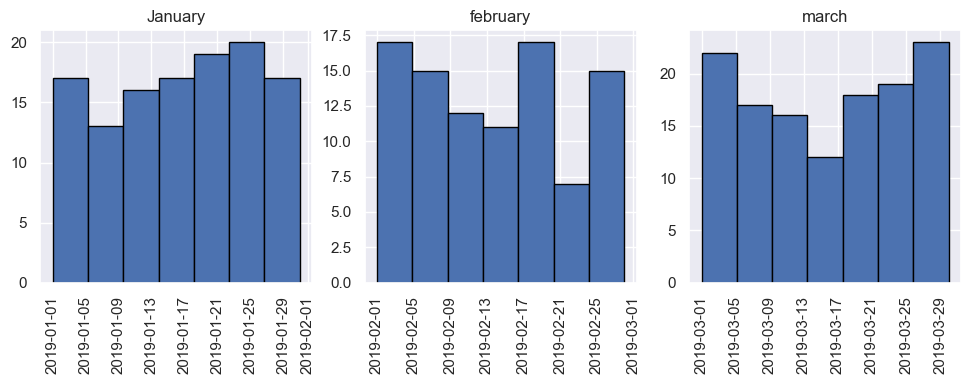

In [47]:
plt.figure(figsize = (10,4))
a=df[(df["Branch"] =="A")]
a_jan=a[a["month"]=="January"]
plt.subplot(1,3,1)
plt.hist(a_jan["Date"],edgecolor="black",bins=7)
plt.xticks(rotation = 90)
plt.title("January")
a_feb=a[a["month"]=="February"]
plt.subplot(1,3,2)
plt.hist(a_feb["Date"],edgecolor="black",bins=7)
plt.xticks(rotation = 90)
plt.title("february")
a_march=a[a["month"]=="March"]
plt.subplot(1,3,3)
plt.hist(a_march["Date"],edgecolor="black",bins=7)
plt.xticks(rotation = 90)
plt.title("march")
plt.show()

#### (13.b) Date wise Customers visiting trend of Branch B for each months 

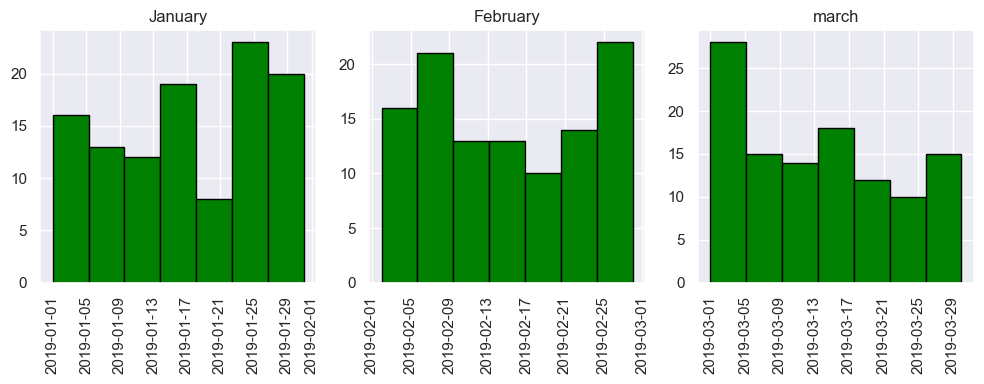

In [48]:
plt.figure(figsize = (10,4))
b=df[(df["Branch"] =="B")]
b_jan=b[b["month"]=="January"]
plt.subplot(1,3,1)
plt.hist(b_jan["Date"],edgecolor="black",bins=7,color = 'green')
plt.xticks(rotation = 90)
plt.title("January")
b_feb=b[b["month"]=="February"]
plt.subplot(1,3,2)
plt.hist(b_feb["Date"],edgecolor="black",bins=7,color = 'green')
plt.xticks(rotation = 90)
plt.title("February")
b_march=b[b["month"]=="March"]
plt.subplot(1,3,3)
plt.hist(b_march["Date"],edgecolor="black",bins=7,color = 'green')
plt.xticks(rotation = 90)
plt.title("march")
plt.show()

#### (13.c) Date wise Customers visiting trend of Branch C for each months 

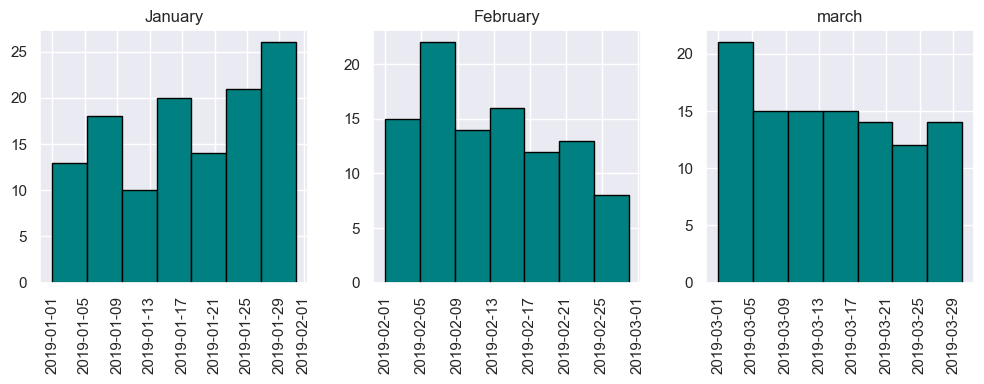

In [49]:
plt.figure(figsize = (10,4))
c=df[(df["Branch"] =="C")]
c_jan=c[c["month"]=="January"]
plt.subplot(1,3,1)
plt.hist(c_jan["Date"],edgecolor="black",bins=7,color = 'teal')
plt.xticks(rotation = 90)
plt.title("January")
c_feb=c[c["month"]=="February"]
plt.subplot(1,3,2)
plt.hist(c_feb["Date"],edgecolor="black",bins=7,color = 'teal')
plt.xticks(rotation = 90)
plt.title("February")
c_march=c[c["month"]=="March"]
plt.subplot(1,3,3)
plt.hist(c_march["Date"],edgecolor="black",bins=7,color = 'teal')
plt.xticks(rotation = 90)
plt.title("march")
plt.show()

#### (14) Find most populated product of the company

In [50]:
df["Product line"].mode()

0    Fashion accessories
Name: Product line, dtype: object

### (15) Product demand at each branch

In [51]:
df.groupby(["Branch"])["Product line"].value_counts()

Branch  Product line          
A       Home and lifestyle        65
        Electronic accessories    60
        Sports and travel         59
        Food and beverages        58
        Fashion accessories       51
        Health and beauty         47
B       Fashion accessories       62
        Sports and travel         62
        Electronic accessories    55
        Health and beauty         53
        Food and beverages        50
        Home and lifestyle        50
C       Food and beverages        66
        Fashion accessories       65
        Electronic accessories    55
        Health and beauty         52
        Home and lifestyle        45
        Sports and travel         45
Name: Product line, dtype: int64

#### (16) Find branch and month wise demand of product detail

In [52]:
df.groupby(["Branch","month"])["Product line"].value_counts()

Branch  month     Product line          
A       February  Food and beverages        21
                  Electronic accessories    18
                  Fashion accessories       16
                  Sports and travel         14
                  Home and lifestyle        13
                  Health and beauty         12
        January   Home and lifestyle        27
                  Sports and travel         24
                  Electronic accessories    21
                  Fashion accessories       20
                  Food and beverages        15
                  Health and beauty         12
        March     Home and lifestyle        25
                  Health and beauty         23
                  Food and beverages        22
                  Electronic accessories    21
                  Sports and travel         21
                  Fashion accessories       15
B       February  Fashion accessories       24
                  Electronic accessories    19
                  S

#### (17) Find Sales of each product 

In [53]:
a=df.groupby(["Product line"])["Total"].sum()
a

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

#### (18) Find  Monthly sale of each product

In [54]:
df.groupby(["Product line","month"])["Total"].sum()

Product line            month   
Electronic accessories  February    17362.9050
                        January     18831.2880
                        March       18143.3385
Fashion accessories     February    19009.8615
                        January     19345.1160
                        March       15950.9175
Food and beverages      February    20000.3580
                        January     19570.5300
                        March       16573.9560
Health and beauty       February    14602.2555
                        January     16383.1710
                        March       18208.3125
Home and lifestyle      February    12434.3835
                        January     20494.7400
                        March       20932.7895
Sports and travel       February    13809.6105
                        January     21667.0230
                        March       19646.1930
Name: Total, dtype: float64

#### (19) Find monthly sale of each product of all branches 

In [55]:
df.groupby(["Branch","Product line","month"])["Total"].sum()

Branch  Product line            month   
A       Electronic accessories  February     5202.7710
                                January      6401.2725
                                March        6713.0700
        Fashion accessories     February     5173.6335
                                January      6847.4910
                                March        4311.3840
        Food and beverages      February     7054.2255
                                January      4646.2290
                                March        5462.6460
        Health and beauty       February     2915.4825
                                January      3962.5950
                                March        5719.6755
        Home and lifestyle      February     4771.6305
                                January     10313.5935
                                March        7331.9715
        Sports and travel       February     4742.3775
                                January      6509.9475
                        

### (20) Find customer's product taste according to the gender

In [56]:
df.groupby(["Branch","Product line"])["Gender"].value_counts()

Branch  Product line            Gender
A       Electronic accessories  Male      32
                                Female    28
        Fashion accessories     Female    28
                                Male      23
        Food and beverages      Male      35
                                Female    23
        Health and beauty       Male      26
                                Female    21
        Home and lifestyle      Male      33
                                Female    32
        Sports and travel       Male      30
                                Female    29
B       Electronic accessories  Female    28
                                Male      27
        Fashion accessories     Female    33
                                Male      29
        Food and beverages      Female    29
                                Male      21
        Health and beauty       Male      33
                                Female    20
        Home and lifestyle      Male      28
                

#### (21) Find the total number of Customers 

In [57]:
print("total customers : ",df["Gender"].count())
df["Gender"].value_counts()

total customers :  1000


Female    501
Male      499
Name: Gender, dtype: int64

#### (22) Which branch has highest customers ?

In [58]:
df.groupby(["Branch"])["Customer type"].count()

Branch
A    340
B    332
C    328
Name: Customer type, dtype: int64

#### (23) How many Customers were normal or Member of the company?

In [59]:
df["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

#### (24) Find Customers type count of each branch

In [60]:
df.groupby(["Branch"])["Customer type"].value_counts()

Branch  Customer type
A       Normal           173
        Member           167
B       Normal           167
        Member           165
C       Member           169
        Normal           159
Name: Customer type, dtype: int64

#### (25) Find count of male or female customer types of each branch

In [61]:
df.groupby(["Branch","Customer type"])["Gender"].value_counts()

Branch  Customer type  Gender
A       Member         Male      87
                       Female    80
        Normal         Male      92
                       Female    81
B       Member         Female    85
                       Male      80
        Normal         Male      90
                       Female    77
C       Member         Female    96
                       Male      73
        Normal         Female    82
                       Male      77
Name: Gender, dtype: int64

#### (26) Find the peak time of Customers visit at supermarket

In [62]:
df["Time"].mode()

0    14:42:00
1    19:48:00
Name: Time, dtype: object

In [63]:
df.groupby(["Branch"])["Time"].value_counts()

Branch  Time    
A       11:51:00    3
        12:43:00    3
        13:34:00    3
        15:48:00    3
        19:44:00    3
                   ..
C       20:47:00    1
        20:50:00    1
        20:51:00    1
        20:54:00    1
        20:59:00    1
Name: Time, Length: 788, dtype: int64

#### (27) Find Highest,lowest and average rating to the company

In [64]:
df["Rating"].agg(["max","min","mean"])

max     10.0000
min      4.0000
mean     6.9727
Name: Rating, dtype: float64

#### (28) Find the percentage of customers who had given 10 ratings

In [65]:
print(len(df[df["Rating"]==10.0]), "customers had given 10 rating")
print((len(df[df["Rating"]==10.0])*100)/df["Rating"].count(),"% customers had given 10 rating")


5 customers had given 10 rating
0.5 % customers had given 10 rating


#### (29)  Find the percentage of customers who had given below 10 ratings ?

In [66]:
print(len(df[df["Rating"]<5.0]), "customers had given below rating")
print((len(df[df["Rating"]<5.0])*100)/df["Rating"].count(),"% customers had given below 5 rating")

153 customers had given below rating
15.3 % customers had given below 5 rating


#### (30) Find  Ratings given by customers at each branch

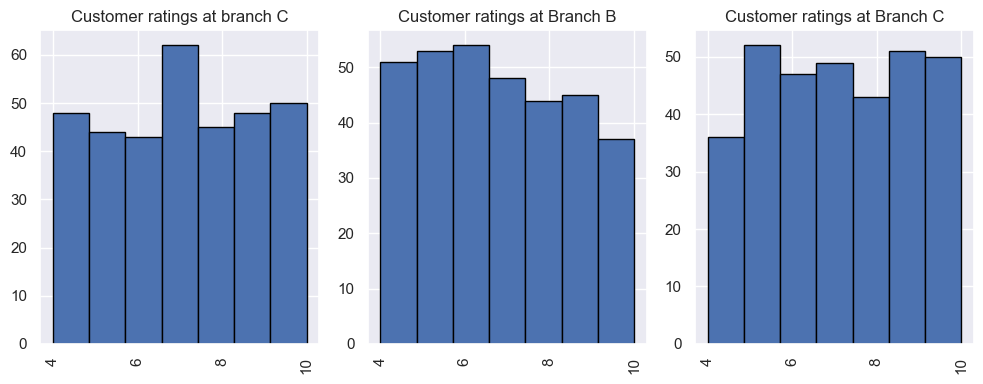

 total customers at branch A is  340
 total customers at branch B is  332
 total customers at branch C is  328


In [67]:
plt.figure(figsize = (10,4))
a=df[(df["Branch"] =="A")]
plt.subplot(1,3,1)
plt.hist(a["Rating"],edgecolor="black",bins=7)
plt.xticks(rotation = 90)
plt.title("Customer ratings at branch C")
b=df[(df["Branch"] =="B")]
plt.subplot(1,3,2)
plt.hist(b["Rating"],edgecolor="black",bins=7)
plt.xticks(rotation = 90)
plt.title("Customer ratings at Branch B")
c=df[(df["Branch"] =="C")]
plt.subplot(1,3,3)
plt.hist(c["Rating"],edgecolor="black",bins=7)
plt.xticks(rotation = 90)
plt.title("Customer ratings at Branch C")
plt.show()
print(" total customers at branch A is ",a["Customer type"].count())
print(" total customers at branch B is ",b["Customer type"].count())
print(" total customers at branch C is ",c["Customer type"].count())


### (31) Find the maximum,minimum and average rating at each branch 

In [68]:
df.groupby(["Branch"])["Rating"].agg(["max","min","mean"])

,max,min,mean
Branch,,,
A,10.0,4.0,7.027059
B,10.0,4.0,6.818072
C,10.0,4.0,7.072866


#### (32) Find the product wise rating 

In [69]:
df.groupby(["Product line"])["Rating"].value_counts()

Product line            Rating
Electronic accessories  7.6       7
                        4.7       6
                        5.5       6
                        6.0       6
                        6.2       5
                                 ..
Sports and travel       8.3       1
                        8.8       1
                        9.2       1
                        9.4       1
                        9.8       1
Name: Rating, Length: 341, dtype: int64

#### (33) Find the product wise rating of each branch

In [70]:
df.groupby(["Branch","Product line"])["Rating"].value_counts()

Branch  Product line            Rating
A       Electronic accessories  4.7       5
                                7.3       4
                                5.0       3
                                6.6       3
                                7.6       3
                                         ..
C       Sports and travel       9.4       1
                                9.5       1
                                9.6       1
                                9.7       1
                                10.0      1
Name: Rating, Length: 674, dtype: int64

## __Section 5: Other projects__

#### <font color = blue> Section 5: Cohort Analysis (notebook 2/3) </font>

#### <font color = blue> Section 6: Customer segmentation and Clustering (notebook 3/3)</font>